# Bank Marketing Classification

## Importing the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv("bank-additional.csv", sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# statistical info
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
# find unique values
data.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

## Exploratory Data Analysis

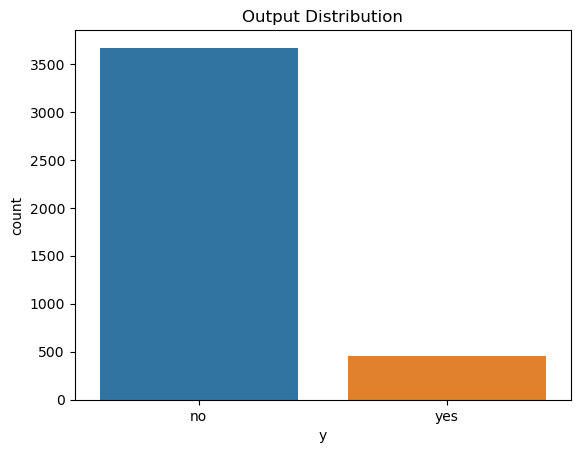

In [7]:
# displaying the distribution of target variable "y"
sns.countplot(x = data["y"])
plt.title("Output Distribution")
plt.show()

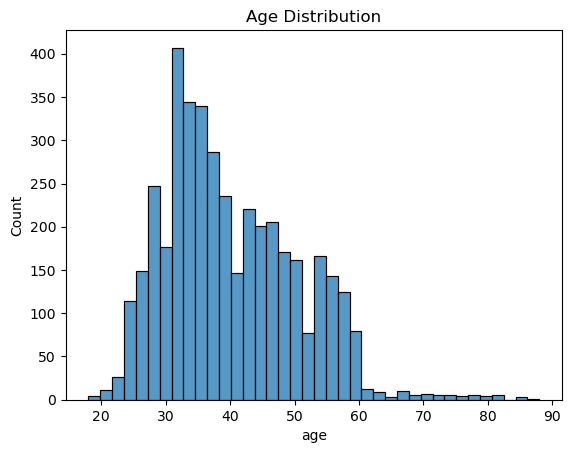

In [8]:
sns.histplot(x = data["age"])
plt.title("Age Distribution")
plt.show()

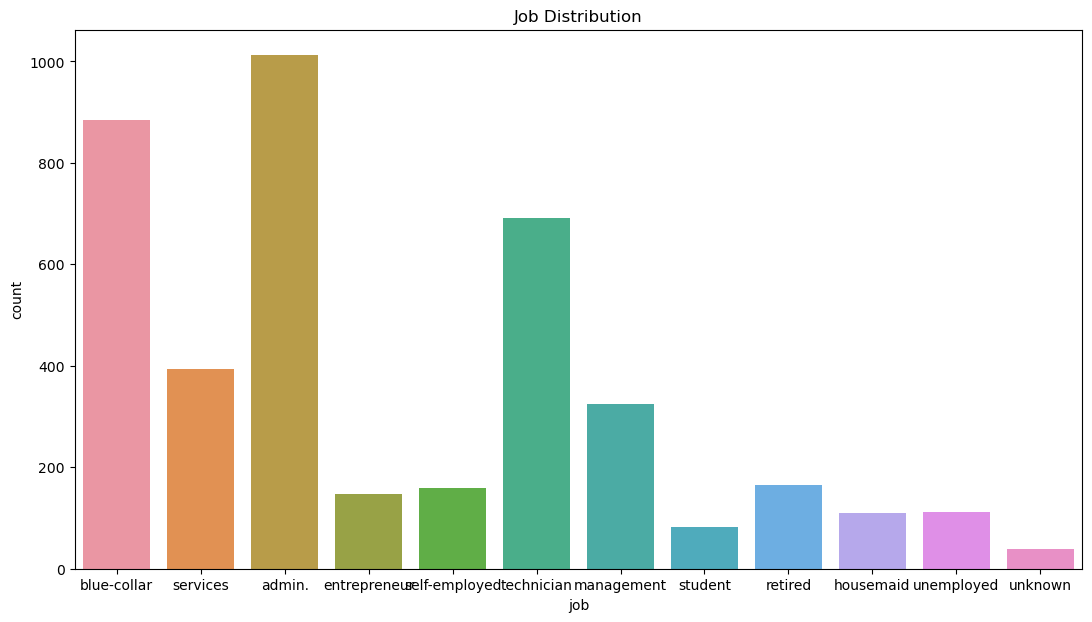

In [9]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["job"])
plt.title("Job Distribution")
plt.show()

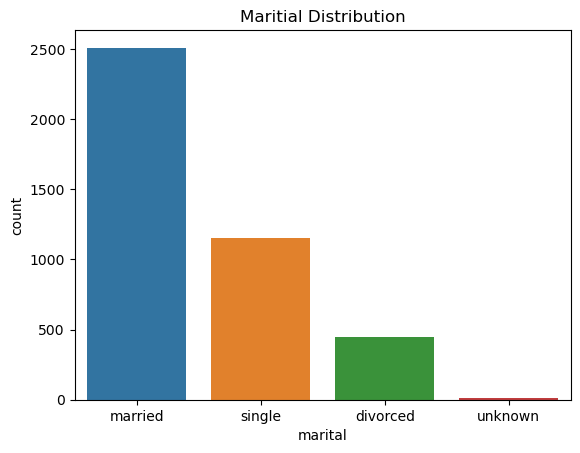

In [10]:
sns.countplot(x = data["marital"])
plt.title("Maritial Distribution")
plt.show()

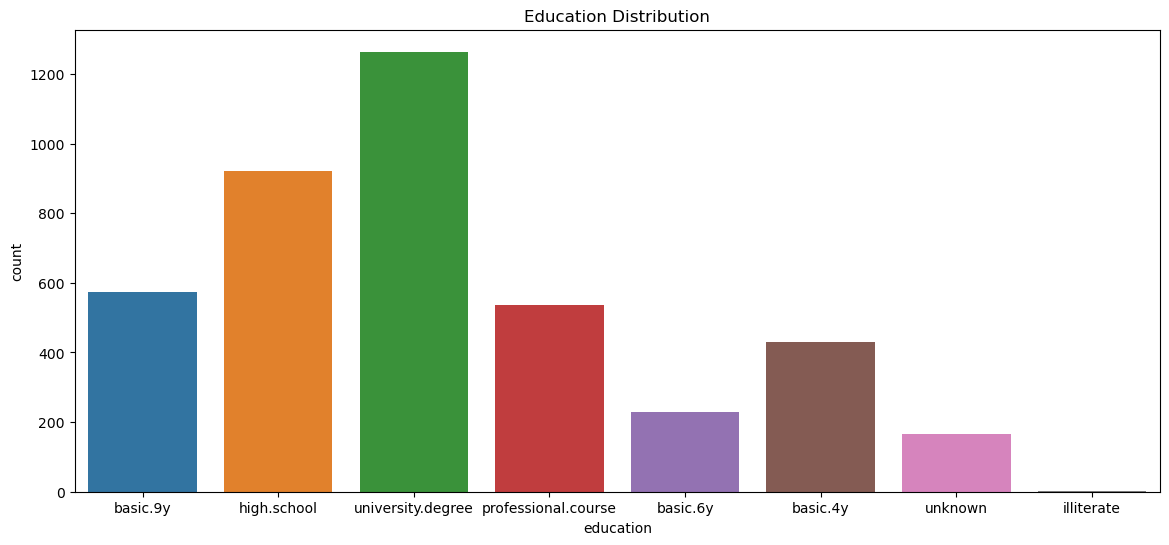

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(x = data["education"])
plt.title("Education Distribution")
plt.show()

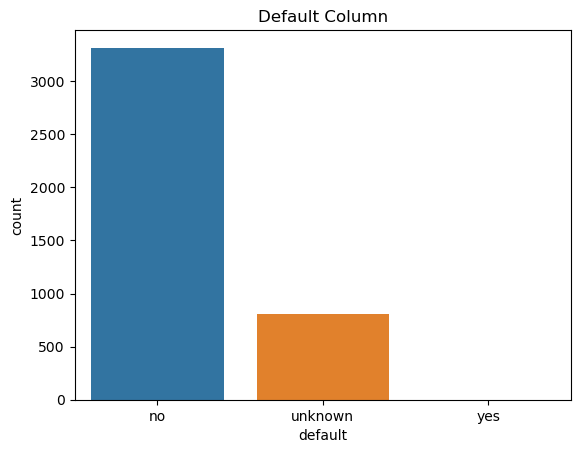

In [12]:
sns.countplot(x = data["default"])
plt.title("Default Column")
plt.show()

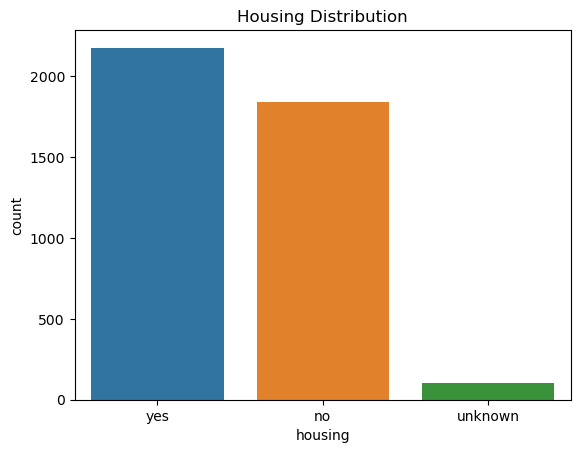

In [13]:
sns.countplot(x = data["housing"])
plt.title("Housing Distribution")
plt.show()

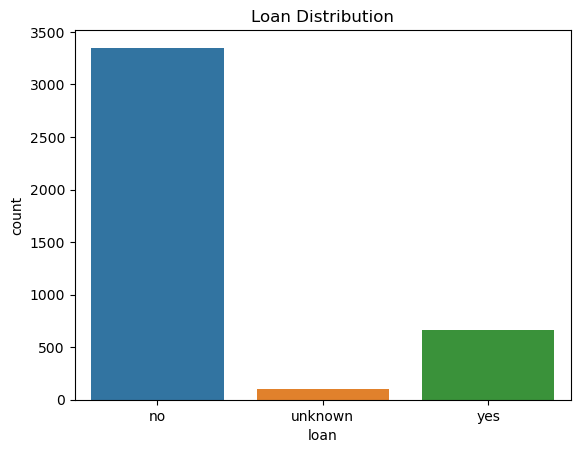

In [14]:
sns.countplot(x = data["loan"])
plt.title("Loan Distribution")
plt.show()

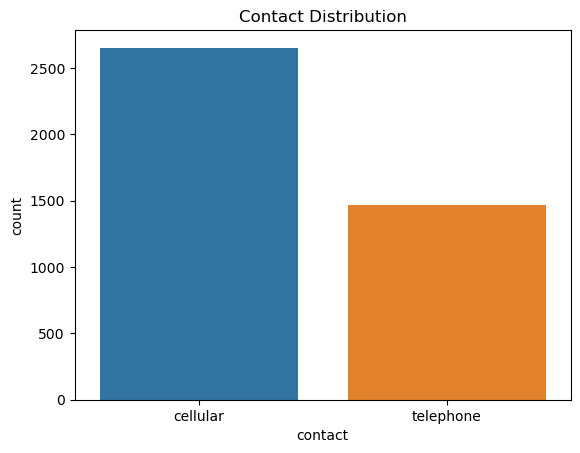

In [15]:
sns.countplot(x = data["contact"])
plt.title("Contact Distribution")
plt.show()

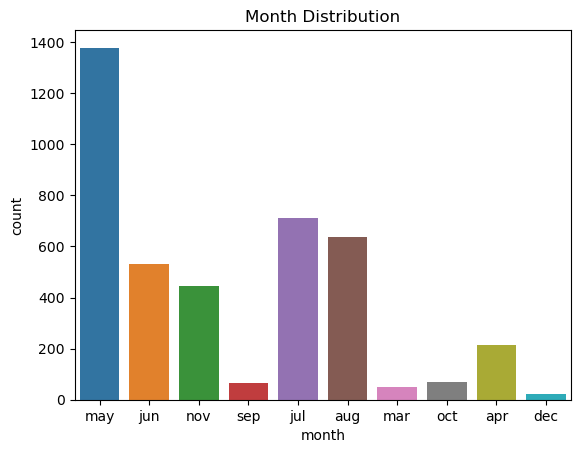

In [16]:
sns.countplot(x = data["month"])
plt.title("Month Distribution")
plt.show()

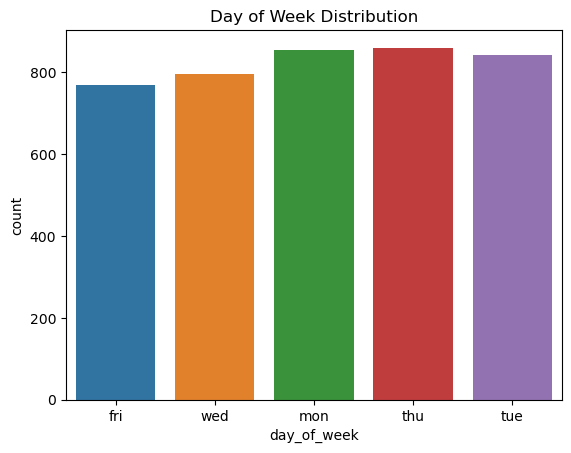

In [17]:
sns.countplot(x = data["day_of_week"])
plt.title("Day of Week Distribution")
plt.show()

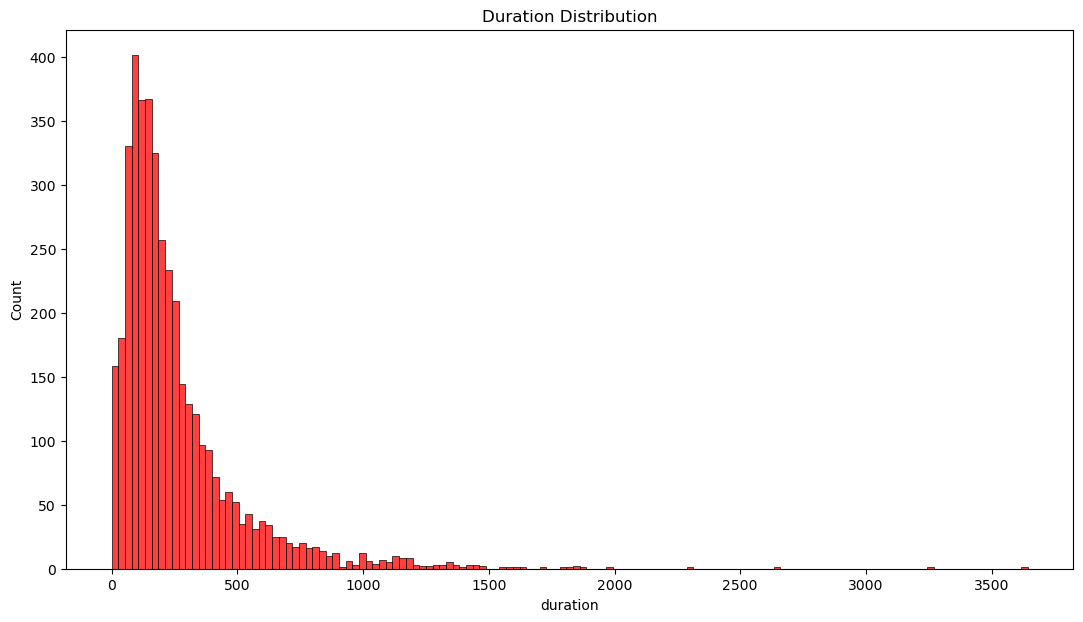

In [18]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["duration"], color = "r")
plt.title("Duration Distribution")
plt.show()

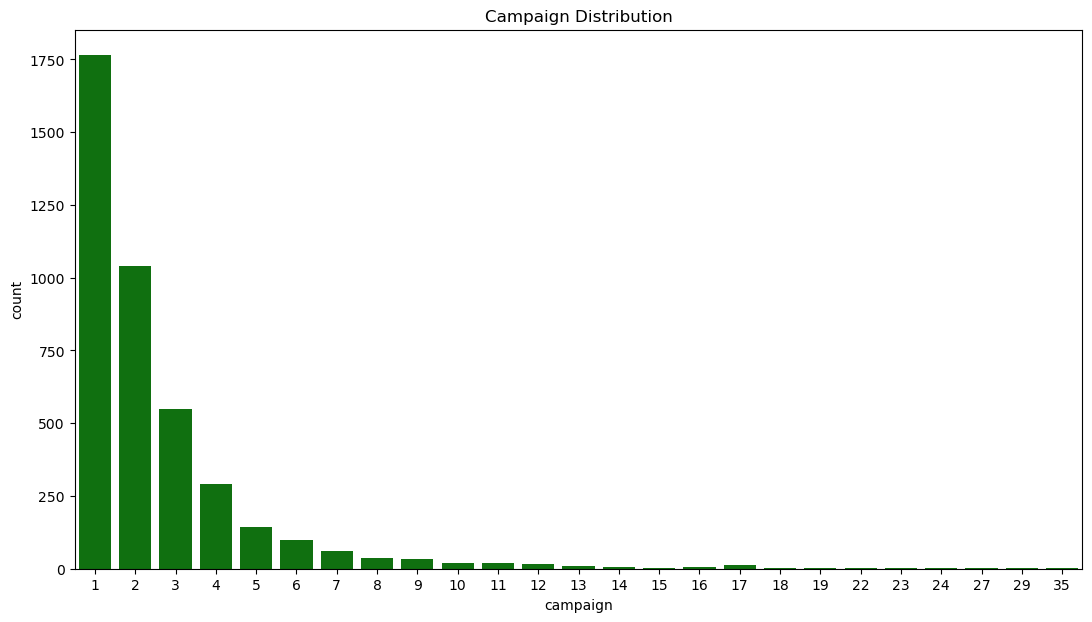

In [19]:
plt.figure(figsize=(13,7))
sns.countplot(x = data["campaign"], color = "g")
plt.title("Campaign Distribution")
plt.show()

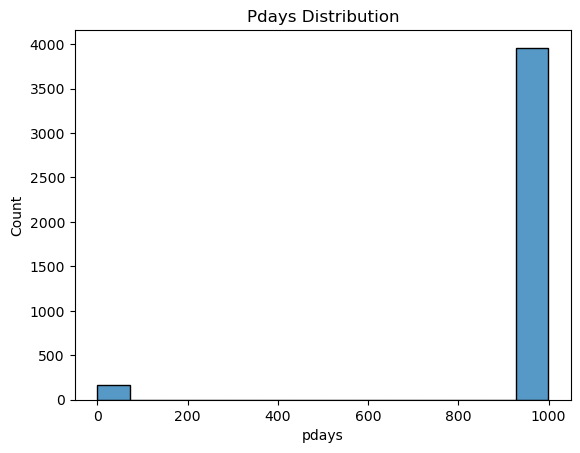

In [20]:
sns.histplot(x = data["pdays"])
plt.title("Pdays Distribution")
plt.show()

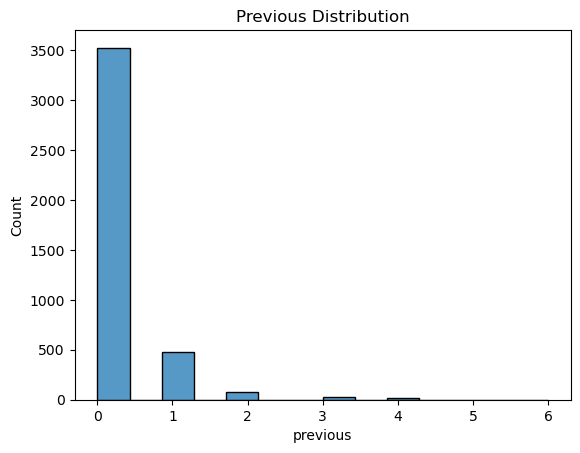

In [21]:
sns.histplot(x = data["previous"])
plt.title("Previous Distribution")
plt.show()

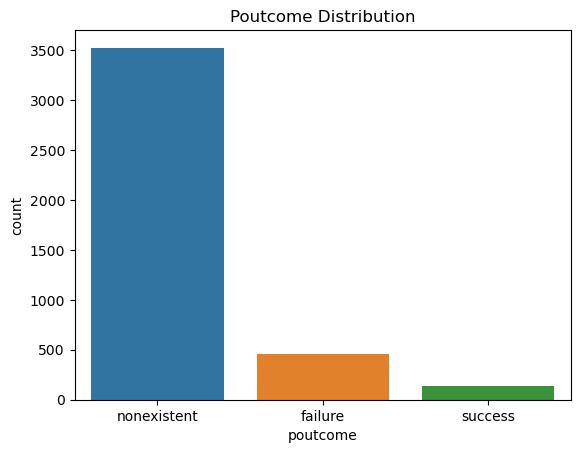

In [22]:
sns.countplot(x = data["poutcome"])
plt.title("Poutcome Distribution")
plt.show()

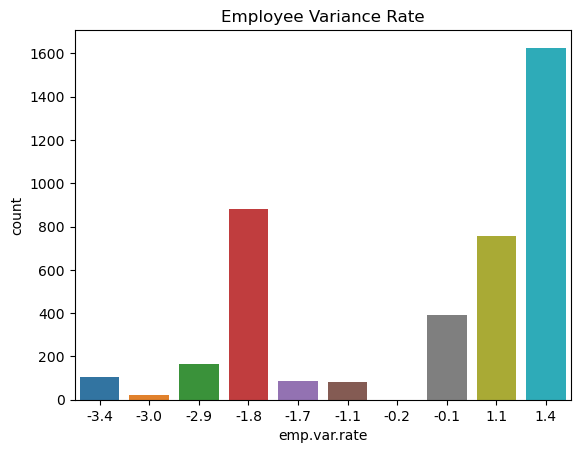

In [23]:
sns.countplot(x = data["emp.var.rate"])
plt.title("Employee Variance Rate")
plt.show()

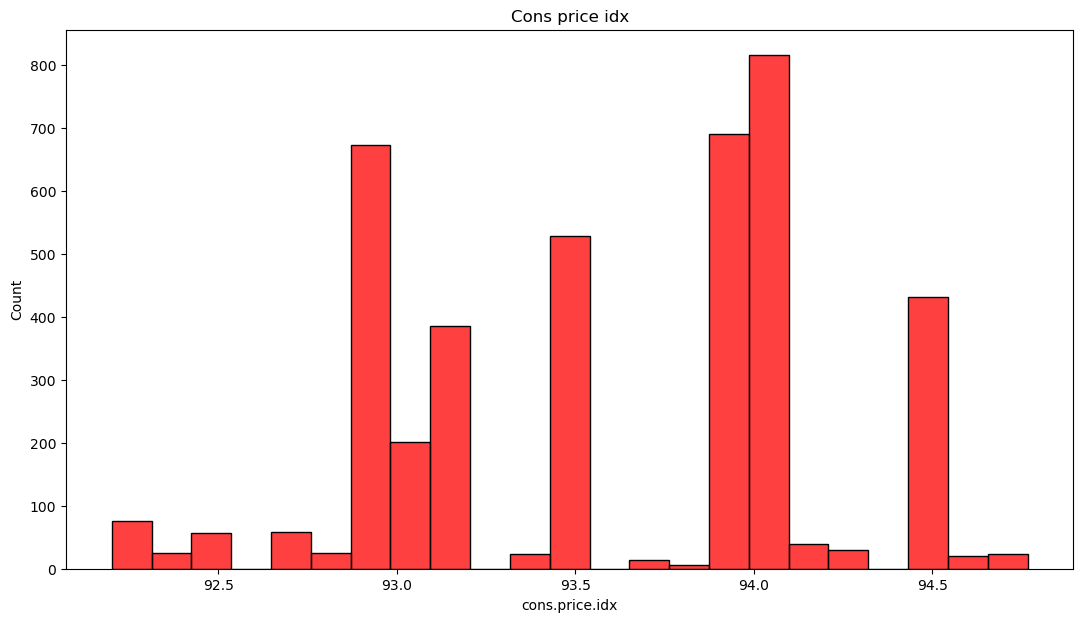

In [24]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.price.idx"], color = "r")
plt.title("Cons price idx")
plt.show()

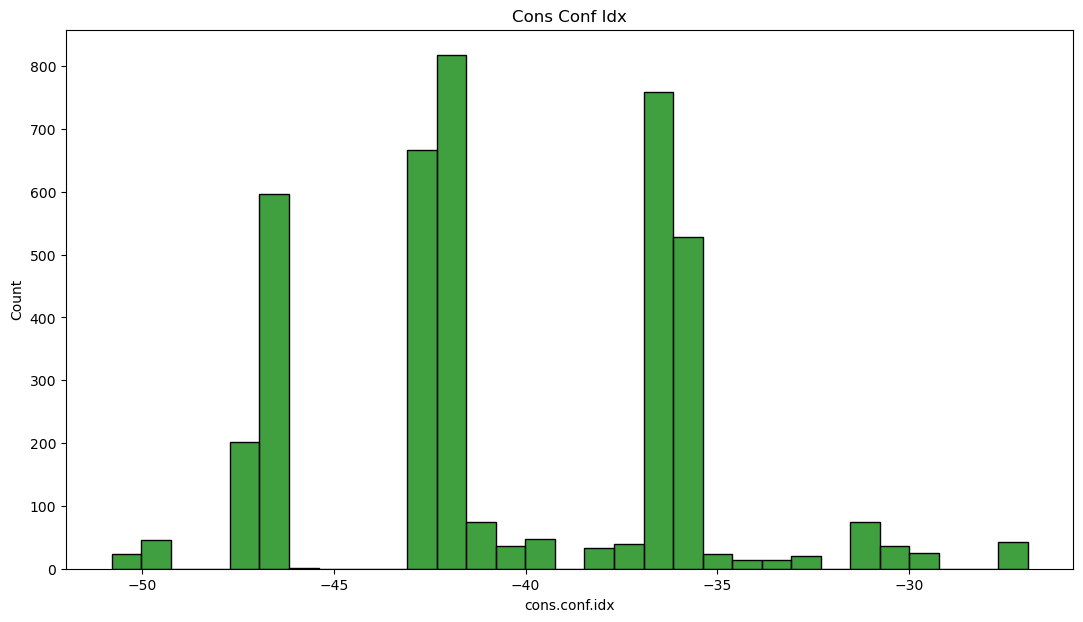

In [25]:
plt.figure(figsize=(13,7))
sns.histplot(x = data["cons.conf.idx"], color = "g")
plt.title("Cons Conf Idx")
plt.show()

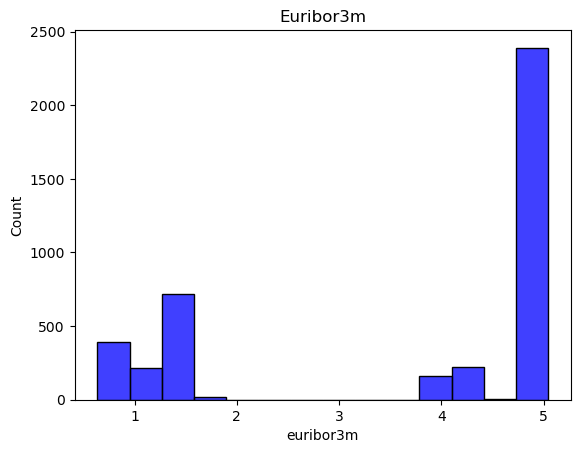

In [26]:
sns.histplot(x = data["euribor3m"], color = "b")
plt.title("Euribor3m")
plt.show()

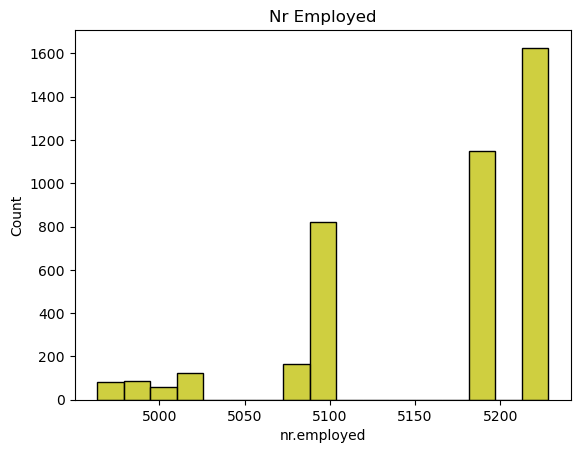

In [27]:
sns.histplot(x = data["nr.employed"], color = "y")
plt.title("Nr Employed")
plt.show()

## Preprocessing the dataset

In [4]:
# check for null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# dropping the irrelevant duration column
data = data.drop(['duration'], axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
# check for duplicate values
data.duplicated().any()

True

In [7]:
# dropping the duplicate values
dups = data.duplicated()
data.drop_duplicates(inplace=True)
# reset indices after dropping rows
data=data.reset_index(drop=True)

# check after dropping the duplicate values
data.duplicated().any()

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
# Handling outliers on the numeric columns, by using the Interquartile Method
numeric_cols = ['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in numeric_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    data.loc[data[column] > upper_limit, column] = upper_limit

In [9]:
# encoding values using one hot encoding to improve the metric
# label encoding
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,2,0,0,6,0,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,2,0,1,4,4,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,1,1,4,0,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,2,0,0,7,1,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [12]:
# applying logarithmic data transformation to reduce the skewness in some columns

# age, campaign and previous are applied log transformation
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation
columns = ['age', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(data[columns])
data['age'] = to_right_skewed[:, 0]
data['campaign'] = to_right_skewed[:, 1]
data['previous'] = to_right_skewed[:, 2]

# nr_employed is applied x² transformation
columns = ['nr.employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(data[columns])
data['nr.employed'] = to_left_skewed[:, 0]

In [13]:
# Feature scaling/normalization on the numeric columns with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.038171,1,1,2,0,2,0,0,6,0,0.168554,0.201515,0.0,1,-1.206244,-1.186098,-1.242001,-1.331658,-0.921970,0
1,0.050548,7,2,3,0,0,0,1,6,0,1.241104,0.201515,0.0,1,0.649324,0.713165,0.892123,0.711514,0.329115,0
2,-1.841959,7,1,3,0,2,0,1,4,4,-1.028624,0.201515,0.0,1,0.841279,1.525656,-0.283823,0.773236,0.840510,0
3,-0.053859,7,1,2,0,1,1,1,4,0,0.816189,0.201515,0.0,1,0.841279,1.525656,-0.283823,0.771506,0.840510,0
4,0.779937,0,1,6,0,2,0,0,7,1,-1.028624,0.201515,0.0,1,-0.118497,-0.656512,-0.327377,0.328492,0.395074,0


## Coorelation Matrix

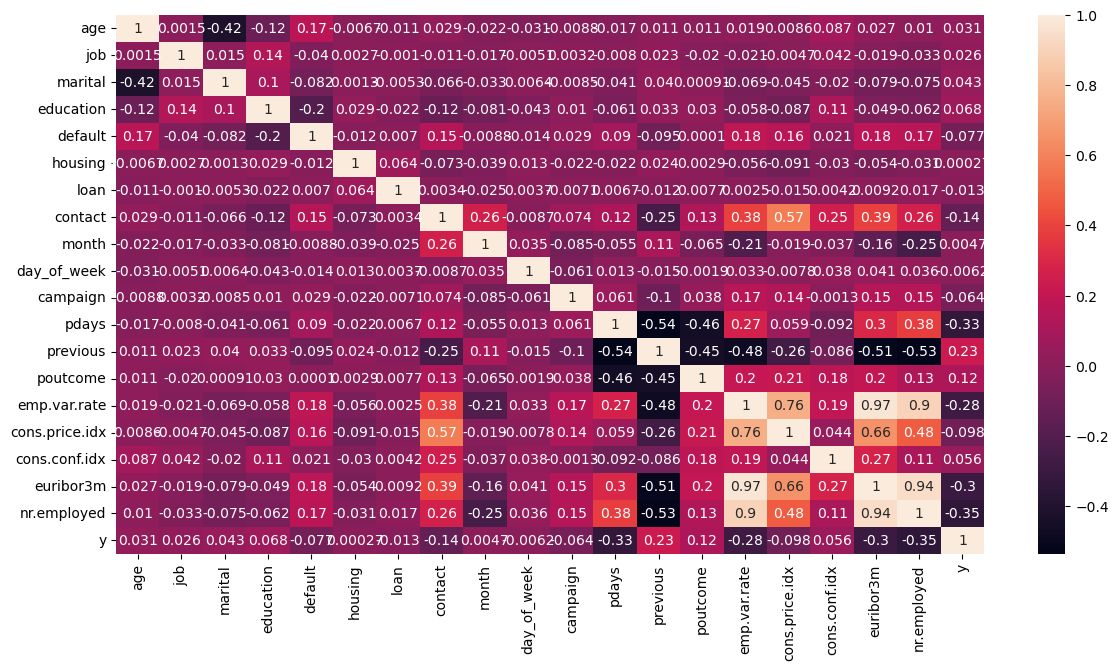

In [14]:
corr = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)
plt.show()

## Input Split

In [15]:
X = data.drop(["y"], axis = 1)
y = data["y"]

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.038171,1,1,2,0,2,0,0,6,0,0.168554,0.201515,0.0,1,-1.206244,-1.186098,-1.242001,-1.331658,-0.921970,0
1,0.050548,7,2,3,0,0,0,1,6,0,1.241104,0.201515,0.0,1,0.649324,0.713165,0.892123,0.711514,0.329115,0
2,-1.841959,7,1,3,0,2,0,1,4,4,-1.028624,0.201515,0.0,1,0.841279,1.525656,-0.283823,0.773236,0.840510,0
3,-0.053859,7,1,2,0,1,1,1,4,0,0.816189,0.201515,0.0,1,0.841279,1.525656,-0.283823,0.771506,0.840510,0
4,0.779937,0,1,6,0,2,0,0,7,1,-1.028624,0.201515,0.0,1,-0.118497,-0.656512,-0.327377,0.328492,0.395074,0


## Model Selection

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
# Function for plotting feature importance.
def plot_feature_importance(model_importance, features, model_name):

    # Create arrays of importance and features
    feature_importance = np.array(model_importance)
    feature_names = np.array(features)

    # Create  Dictionary for storing importance and names
    data={'features':feature_names,'importance':feature_importance}
    f_d = pd.DataFrame(data)

    # Sort by feature importance
    f_d.sort_values(by=['importance'], ascending=False,inplace=True)

    # Modify plot options
    plt.figure(figsize=(10,8))

    sns.barplot(x=f_d['importance'], y=f_d['features'])

    plt.title(model_name + 'Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9115498026189102
Test score: 0.9045252709938618
Model Score: 0.9077669902912622

RMSE: 0.3036988799925641


In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(),LogisticRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9118964230695166
Test score: 0.9045252709938618
Model Score: 0.9077669902912622

RMSE: 0.3036988799925641


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(C=c_values)

grid = GridSearchCV(LogisticRegression( max_iter=1000000), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'C': 0.1}


In [41]:
model = make_pipeline(StandardScaler(),LogisticRegression(C=1))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9118964230695166
Test score: 0.9045252709938618
Model Score: 0.9077669902912622

RMSE: 0.3036988799925641


### Ridge Classifier

In [42]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9063444781436549
Test score: 0.9085836489486743
Model Score: 0.9134304207119741

RMSE: 0.2942270879576282


In [43]:
model = make_pipeline(StandardScaler(), RidgeClassifier())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9063444781436549
Test score: 0.9085836489486743
Model Score: 0.9134304207119741

RMSE: 0.2942270879576282


In [44]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha = np.geomspace(100, 0.01, 5)

param_grid = dict(solver=solvers,alpha=alpha)

grid = GridSearchCV(RidgeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'alpha': 10.0, 'solver': 'auto'}


In [45]:
model = make_pipeline(StandardScaler(), RidgeClassifier(alpha = 10))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9059972559214327
Test score: 0.9102030821470549
Model Score: 0.9118122977346278

RMSE: 0.29696414306338764


### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8903915126131331
Test score: 0.8818858560794045
Model Score: 0.8794498381877023

RMSE: 0.34720334360760086


In [47]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 100, 'min_samples_split': 2}


In [48]:
model = DecisionTreeClassifier(max_leaf_nodes = 100, min_samples_split = 3 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9004507269401116
Test score: 0.8867245657568239
Model Score: 0.8915857605177994

RMSE: 0.32926317662654087


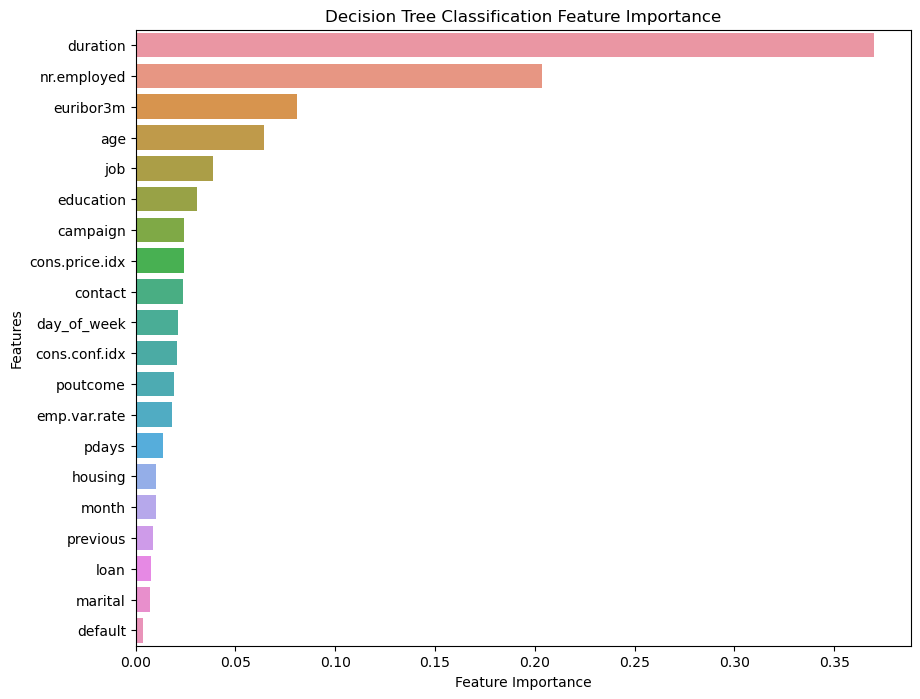

In [49]:
plot_feature_importance(model.feature_importances_,X.columns,'Decision Tree Classification ')

### Random Forest Classification

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.904613181205469
Test score: 0.9037318793261069
Model Score: 0.8996763754045307

RMSE: 0.3167390481065908


In [52]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'entropy', 'max_leaf_nodes': 150, 'min_samples_split': 10}


In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy", max_leaf_nodes = 100, min_samples_split = 10)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9077339688041596
Test score: 0.9093933655478648
Model Score: 0.9037216828478964

RMSE: 0.3167390481065908


In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'Random Forest Classification ')

### XGBoost Classification

In [54]:
#!pip install xgboost

In [55]:
from xgboost import XGBClassifier  

model = XGBClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9053124398228384
Test score: 0.8883570589003525
Model Score: 0.8964401294498382

RMSE: 0.3167390481065908


In [56]:
param_grid = {"max_depth":range(3,10) }

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 3}


In [57]:
from xgboost import XGBClassifier  

model = XGBClassifier(max_depth = 8)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9046216060080878
Test score: 0.8923991119237298
Model Score: 0.8932038834951457

RMSE: 0.3167390481065908


In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'XGBoost Classification ')

### LightGBM

In [58]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 1.2 MB/s eta 0:00:00


In [59]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9084308203350664
Test score: 0.9004962779156328
Model Score: 0.8932038834951457

RMSE: 0.3167390481065908


In [60]:
param_grid = {"num_leaves":range(100,700, 100) }

grid = GridSearchCV(LGBMClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'num_leaves': 100}


In [61]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves = 200)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9060038754092046
Test score: 0.9013157894736843
Model Score: 0.8964401294498382

RMSE: 0.3167390481065908


In [ ]:
plot_feature_importance(model.feature_importances_,X.columns,'LightGBM Classification ')